In [21]:
import numpy as np
import pandas as pd

In [22]:
def create_df(filename):
    return pd.read_csv(filename)

In [23]:
test_df = create_df('test.csv')
train_df = create_df('train.csv')

In [24]:
display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
all_data_na = (train_df.isnull().sum() / len(train_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [29]:
columns_with_nan = train_df.columns[train_df.isnull().any()].tolist()
print(columns_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [30]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])

print(numerical_columns)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [31]:
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\fabri\AppData\Local\Temp\ipykernel_10400\2878792426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

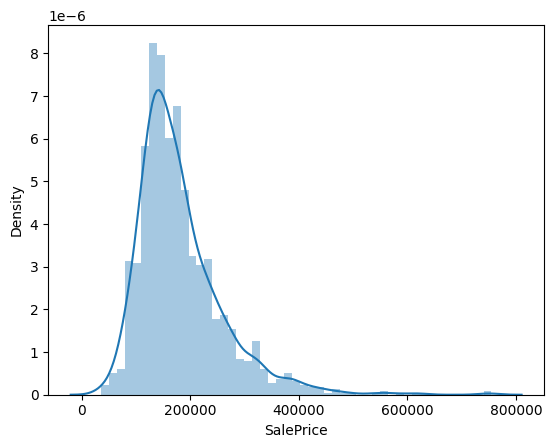

In [33]:
sns.distplot(train_df['SalePrice'])

In [34]:
def corr_heatmap(df, corr_type):
    plt.figure(figsize=(5, 9))
    correlations = df.corr(corr_type)[['SalePrice']]
    high_correlations = correlations[correlations['SalePrice'].abs() > 0.2].sort_values('SalePrice', ascending=False)
    sns.heatmap(high_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [35]:
numerical_columns.fillna(0, inplace=True)

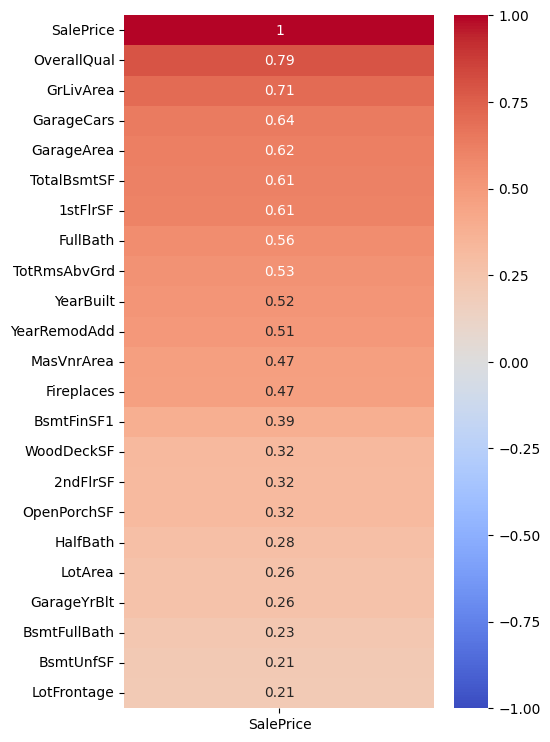

In [36]:
corr_heatmap(numerical_columns, 'pearson')

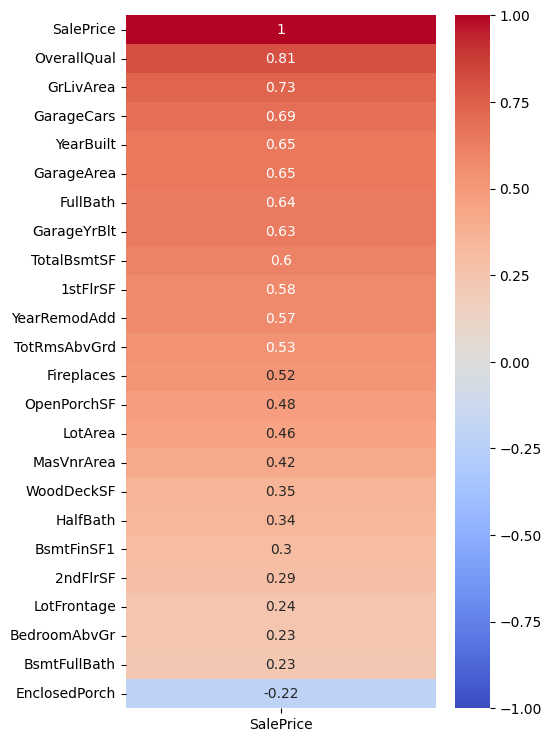

In [37]:
corr_heatmap(numerical_columns, 'spearman')

In [38]:
def plot_top_correlation_heatmap(dataframe, target_column, k=10):
    # Calculate correlations
    correlations = dataframe.corr()

    # Select the top correlated columns with the target variable
    top_corr_columns = correlations[target_column].abs().nlargest(k).index
    top_corr_df = dataframe[top_corr_columns]

    # Create a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Top {k} Correlated Features with {target_column}')

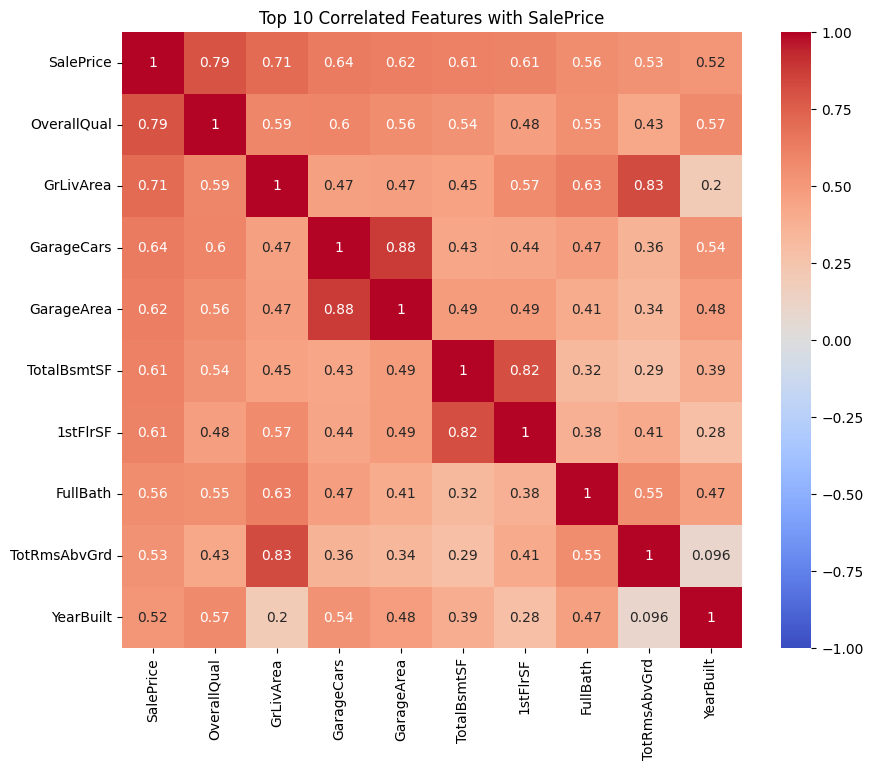

In [39]:
# Call the function with your DataFrame and target variable
plot_top_correlation_heatmap(numerical_columns, 'SalePrice', k=10)

### GarageArea, FullBath, 

In [40]:
categorical_columns = train_df.select_dtypes(include=['object'])

categorical_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical columns
encoder.fit(categorical_columns)

# Transform the categorical columns using one-hot encoding
encoded_columns = encoder.transform(categorical_columns).toarray()

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns.columns))

# Combine the numerical columns and the encoded categorical columns
combined_df = pd.concat([numerical_columns, encoded_df], axis=1)

display(combined_df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
combined_df.dtypes

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 306, dtype: object

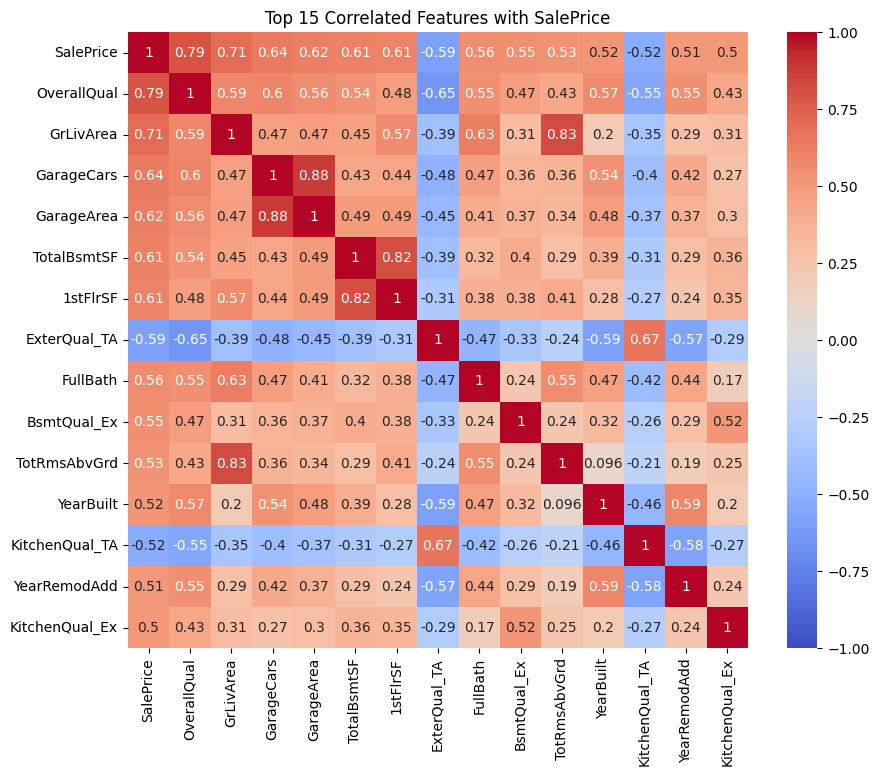

In [44]:
plot_top_correlation_heatmap(combined_df, 'SalePrice', k=15)

Mean Squared Error (MSE): 1231098415.3180075
Mean Absolute Error (MAE): 21501.54016016377
Coefficient of Determination (R^2): 0.8047978937841908


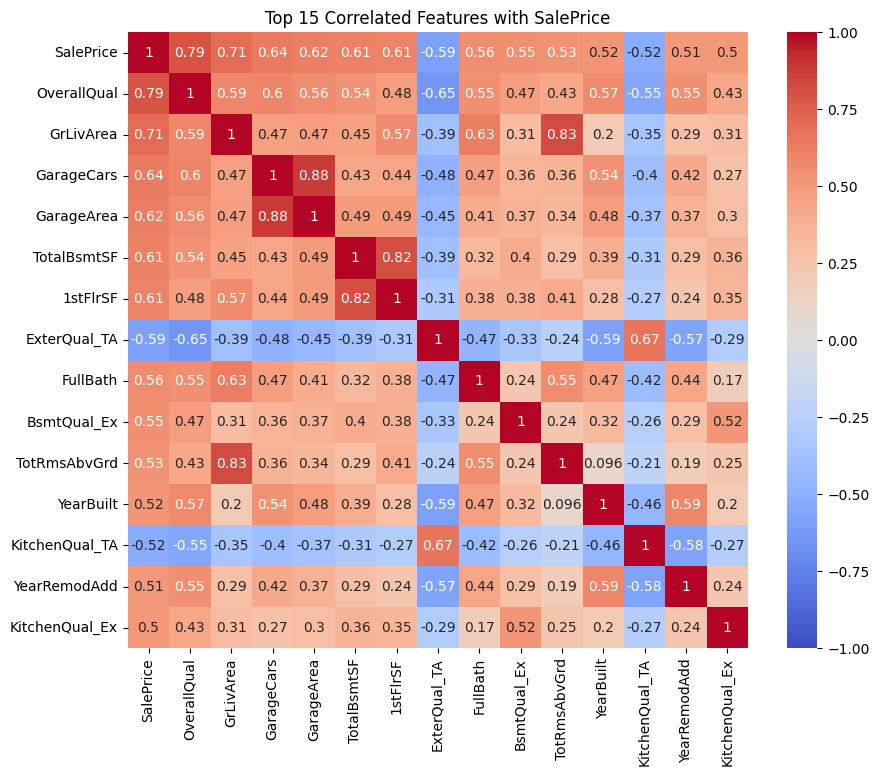

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_top_correlation_heatmap(dataframe, target_column, k=10):
    # Calculate correlations
    correlations = dataframe.corr()

    # Select the top correlated columns with the target variable
    top_corr_columns = correlations[target_column].abs().nlargest(k).index
    top_corr_df = dataframe[top_corr_columns]

    # Create a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Top {k} Correlated Features with {target_column}')
    
    return top_corr_df

# Call the function to get the top correlated features
top_corr_df = plot_top_correlation_heatmap(combined_df, 'SalePrice', k=15)

# Split the combined DataFrame into features (X) and target (y)
X = top_corr_df.drop('SalePrice', axis=1)
y = combined_df['SalePrice']

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Perform predictions
y_pred = model.predict(X)

# Calculate regression metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the regression metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 129182048.69484793
Mean Absolute Error (MAE): 7131.092108882613
Coefficient of Determination (R^2): 0.9795169844451519


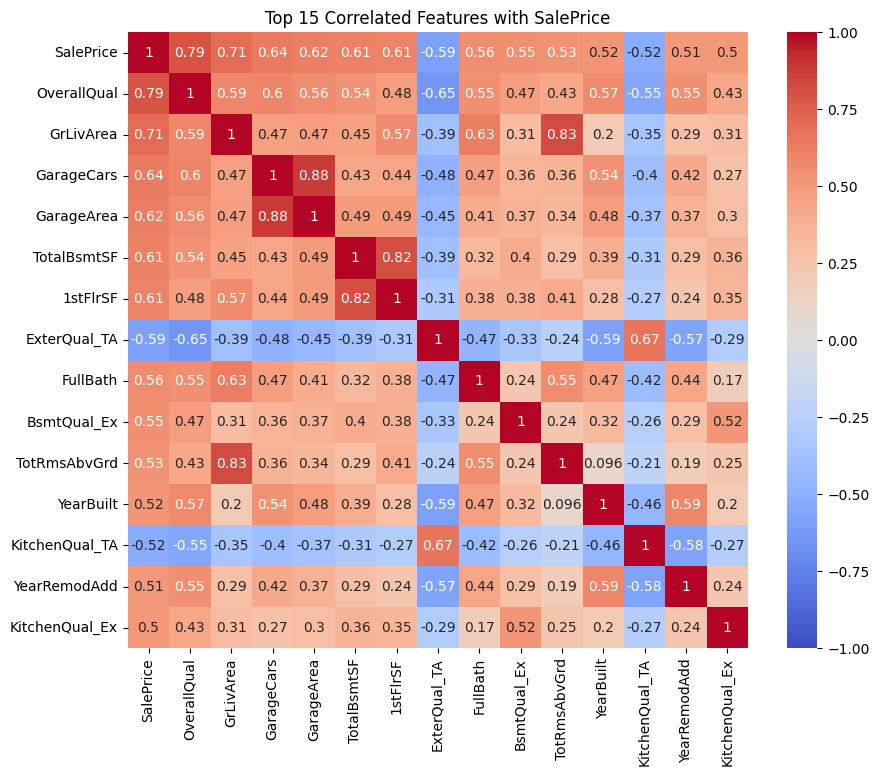

In [47]:
from sklearn.ensemble import RandomForestRegressor

def plot_top_correlation_heatmap(dataframe, target_column, k=10):
    # Calculate correlations
    correlations = dataframe.corr()

    # Select the top correlated columns with the target variable
    top_corr_columns = correlations[target_column].abs().nlargest(k).index
    top_corr_df = dataframe[top_corr_columns]

    # Create a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Top {k} Correlated Features with {target_column}')
    
    return top_corr_df

# Call the function to get the top correlated features
top_corr_df = plot_top_correlation_heatmap(combined_df, 'SalePrice', k=15)

# Split the combined DataFrame into features (X) and target (y)
X = top_corr_df.drop('SalePrice', axis=1)
y = combined_df['SalePrice']

# Initialize and fit the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X, y)

# Perform predictions
y_pred = model.predict(X)

# Calculate regression metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the regression metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)